<a href="https://colab.research.google.com/github/Igoru-Kai/primeiro-projeto-previsao-salarial/blob/main/PrimeiroProjeto_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [322]:
# 1. Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [323]:
# 2. Carregamento
df = pd.read_csv('Salary.csv')

In [324]:
# 3. Separação
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [325]:
# 4. Divisão em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [326]:
# 5. Treino do Modelo
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [327]:
# 6. Previsão
previsoes = regressor.predict(x_test)

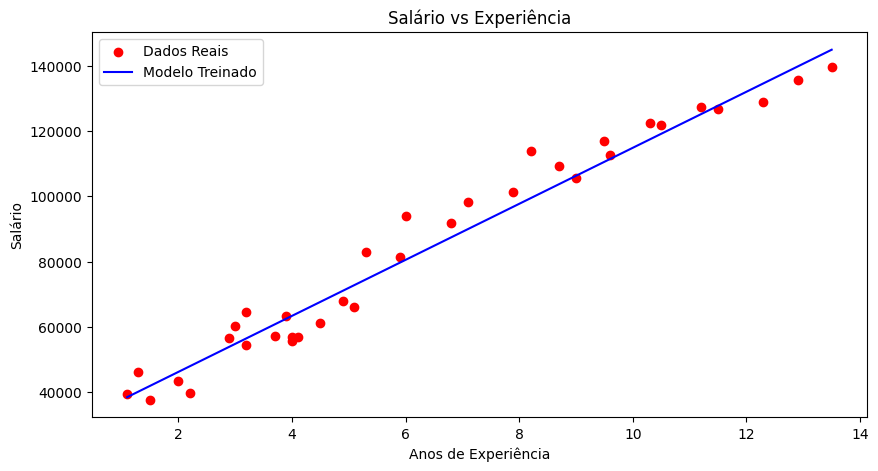

In [339]:
# 7. Gráfico para o Portfólio
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='red', label='Dados Reais')
plt.plot(x, regressor.predict(x), color='blue', label='Modelo Treinado')
plt.title('Salário vs Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend();


In [336]:
plt.savefig('grafico_regressao_salarial.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [317]:
# 1. Preparando o DataFrame (Salário Real e Previsão)
df_comparacao = pd.DataFrame({
    'Salário Real': y,
    'Previsão do Modelo': regressor.predict(x)
    })

In [310]:
# 2. Criando apenas a coluna de Acerto (%)
df_comparacao['Acerto(%)'] = (1 - (abs(df_comparacao['Salário Real'] - df_comparacao['Previsão do Modelo']) / df_comparacao['Salário Real'])) * 100

In [311]:
# 3. Automação: Identificar colunas float
lista_colunas_float = []

In [312]:
# 4. Percorrendo as colunas para checar o tipo
for i in range(0, len(df_comparacao.columns)):
    # Verificamos se o tipo da coluna é float
    if df_comparacao.dtypes.iloc[i] == np.float64:
        lista_colunas_float.append(df_comparacao.columns[i])

In [313]:
# 5. Criando um dicionário para formatar cada coluna do seu jeito
formatos = {col: "{:.1f}" for col in lista_colunas_float}
formatos['Acerto(%)'] = "{:.1f}%"

In [314]:
# 6. Estilização Final
df_estilizado = df_comparacao.style.format(formatos).background_gradient(subset=['Acerto(%)'], cmap='Blues')

In [315]:
df_estilizado

,Salário Real,Previsão do Modelo,Acerto(%)
0,39343,38515.3,97.9%
1,46205,40231.0,87.1%
2,37731,41946.8,88.8%
3,43525,46236.2,93.8%
4,39891,47951.9,79.8%
5,56642,53957.1,95.3%
6,60150,54814.9,91.1%
7,54445,56530.7,96.2%
8,64445,56530.7,87.7%
9,57189,60820.1,93.7%
